In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
data = pd.read_csv('/content/Perungudi, Chennai - TNPCB.csv')
data.head()

,From Date,To Date,PM2.5,NO2,SO2,CO,Ozone,RH,WS,Temp,WD,SR
0,01-01-2024 00:00,01-01-2024 00:15,58.0,5.5,2.7,0.58,15.54,72.0,1.1,28.1,135.0,6.0
1,01-01-2024 00:15,01-01-2024 00:30,58.0,2.9,2.9,0.65,15.43,71.0,0.9,26.6,155.0,6.0
2,01-01-2024 00:30,01-01-2024 00:45,58.0,3.0,3.5,0.66,15.48,71.0,0.8,26.1,123.0,6.0
3,01-01-2024 00:45,01-01-2024 01:00,129.0,2.8,3.9,0.66,15.66,72.0,0.9,25.8,143.0,5.0
4,01-01-2024 01:00,01-01-2024 01:15,129.0,2.6,4.3,0.65,15.48,72.0,0.9,25.5,122.0,6.0


In [ ]:
data.tail()

,From Date,To Date,PM2.5,NO2,SO2,CO,Ozone,RH,WS,Temp,WD,SR
35132,31-12-2024 23:00,31-12-2024 23:15,84.0,7.0,10.4,0.93,15.37,84.0,0.4,25.6,54.0,8.0
35133,31-12-2024 23:15,31-12-2024 23:30,84.0,9.0,9.9,0.90,13.07,84.0,0.4,25.7,64.0,9.0
35134,31-12-2024 23:30,31-12-2024 23:45,84.0,6.6,9.5,0.90,15.50,85.0,0.5,25.8,68.0,8.0
35135,31-12-2024 23:45,01-01-2025 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35136,01-01-2025 00:00,01-01-2025 00:00,93.0,5.2,8.2,0.89,17.29,85.0,0.4,25.6,66.0,8.0


In [ ]:
data = data[:-1]
data.tail()

,From Date,To Date,PM2.5,NO2,SO2,CO,Ozone,RH,WS,Temp,WD,SR
35131,31-12-2024 22:45,31-12-2024 23:00,84.0,7.3,9.4,0.95,13.31,83.0,0.3,25.5,76.0,7.0
35132,31-12-2024 23:00,31-12-2024 23:15,84.0,7.0,10.4,0.93,15.37,84.0,0.4,25.6,54.0,8.0
35133,31-12-2024 23:15,31-12-2024 23:30,84.0,9.0,9.9,0.90,13.07,84.0,0.4,25.7,64.0,9.0
35134,31-12-2024 23:30,31-12-2024 23:45,84.0,6.6,9.5,0.90,15.50,85.0,0.5,25.8,68.0,8.0
35135,31-12-2024 23:45,01-01-2025 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = data[['From Date','PM2.5','NO2','RH','WS']]
df.head()

,From Date,PM2.5,NO2,RH,WS
0,01-01-2024 00:00,58.0,5.5,72.0,1.1
1,01-01-2024 00:15,58.0,2.9,71.0,0.9
2,01-01-2024 00:30,58.0,3.0,71.0,0.8
3,01-01-2024 00:45,129.0,2.8,72.0,0.9
4,01-01-2024 01:00,129.0,2.6,72.0,0.9


In [ ]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())

(35136, 5)
From Date     object
PM2.5        float64
NO2          float64
RH           float64
WS           float64
dtype: object
From Date       0
PM2.5        3748
NO2          1160
RH            444
WS            444
dtype: int64


In [ ]:
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')

<ipython-input-7-a79d403c892e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')


In [ ]:
df.dtypes

,0
From Date,datetime64[ns]
PM2.5,float64
NO2,float64
RH,float64
WS,float64


In [ ]:
df.head()

,From Date,PM2.5,NO2,RH,WS
0,2024-01-01 00:00:00,58.0,5.5,72.0,1.1
1,2024-01-01 00:15:00,58.0,2.9,71.0,0.9
2,2024-01-01 00:30:00,58.0,3.0,71.0,0.8
3,2024-01-01 00:45:00,129.0,2.8,72.0,0.9
4,2024-01-01 01:00:00,129.0,2.6,72.0,0.9


In [ ]:
df['Month'] = df['From Date'].dt.month
df['Day'] = df['From Date'].dt.day
df['Hour'] = df['From Date'].dt.hour
df['Quadrant'] = df['From Date'].dt.minute // 15

<ipython-input-9-ae011843e83c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['From Date'].dt.month
<ipython-input-9-ae011843e83c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['From Date'].dt.day
<ipython-input-9-ae011843e83c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
df.head()

,From Date,PM2.5,NO2,RH,WS,Month,Day,Hour,Quadrant
0,2024-01-01 00:00:00,58.0,5.5,72.0,1.1,1,1,0,0
1,2024-01-01 00:15:00,58.0,2.9,71.0,0.9,1,1,0,1
2,2024-01-01 00:30:00,58.0,3.0,71.0,0.8,1,1,0,2
3,2024-01-01 00:45:00,129.0,2.8,72.0,0.9,1,1,0,3
4,2024-01-01 01:00:00,129.0,2.6,72.0,0.9,1,1,1,0


In [ ]:
df = df.set_index('From Date').sort_index()

# Interpolate based on time
df[['PM2.5', 'NO2', 'RH', 'WS']] = df[['PM2.5', 'NO2', 'RH', 'WS']].interpolate(method='time')

# Fill anything left with ffill + bfill
df[['PM2.5', 'NO2', 'RH', 'WS']] = df[['PM2.5', 'NO2', 'RH', 'WS']].fillna(method='ffill').fillna(method='bfill')

<ipython-input-10-a7733cbd01fe>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['PM2.5', 'NO2', 'RH', 'WS']] = df[['PM2.5', 'NO2', 'RH', 'WS']].fillna(method='ffill').fillna(method='bfill')


In [ ]:
df.reset_index(inplace=True)

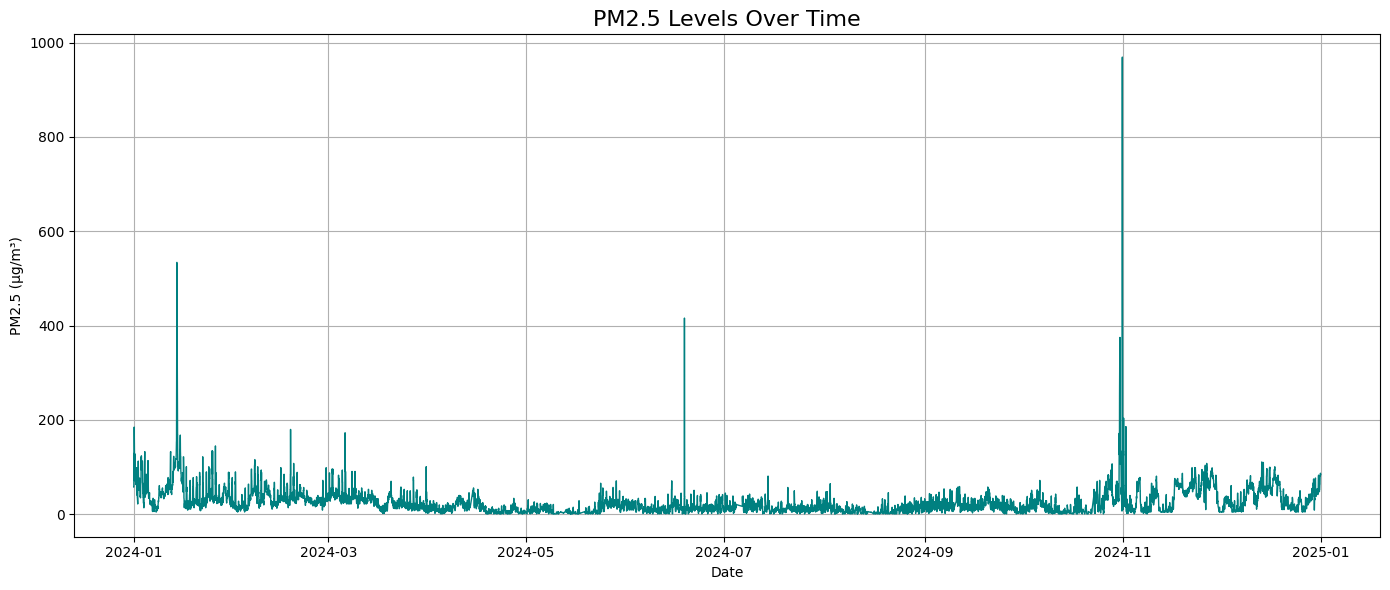

In [ ]:
import matplotlib.pyplot as plt
df = df.set_index('From Date').sort_index()

# Plot PM2.5 values
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['PM2.5'], color='teal', linewidth=1)
plt.title('PM2.5 Levels Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
features = ['PM2.5', 'NO2', 'RH', 'WS', 'Month', 'Day', 'Hour', 'Quadrant']
data = df[features].dropna().values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 32
X, y = create_sequences(data_scaled, n_steps)

In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_steps, X.shape[2])),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - loss: 0.0126 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 2/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 0.0056 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 3/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 0.0041 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 4/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - loss: 0.0034 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 5/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 0.0025 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 6/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 0.0027 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 7/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - loss: 0.0024 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 8/30
703/703 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - loss: 0.0022 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 9/30
701/703 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023
Epoch 9: ReduceLROnPlateau reducing 

In [ ]:
y_pred = model.predict(X_test)

# Inverse scale predicted + actual
pm25_index = features.index('PM2.5')
y_pred_inv = scaler.inverse_transform(np.hstack((y_pred, np.zeros((len(y_pred), len(features)-1)))))[:, pm25_index]
y_test_inv = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1)))))[:, pm25_index]

print("MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
print("R²:", r2_score(y_test_inv, y_pred_inv))


220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
MAE: 2.120278722535175
RMSE: 12.010753016220225
R²: 0.9125778076192668


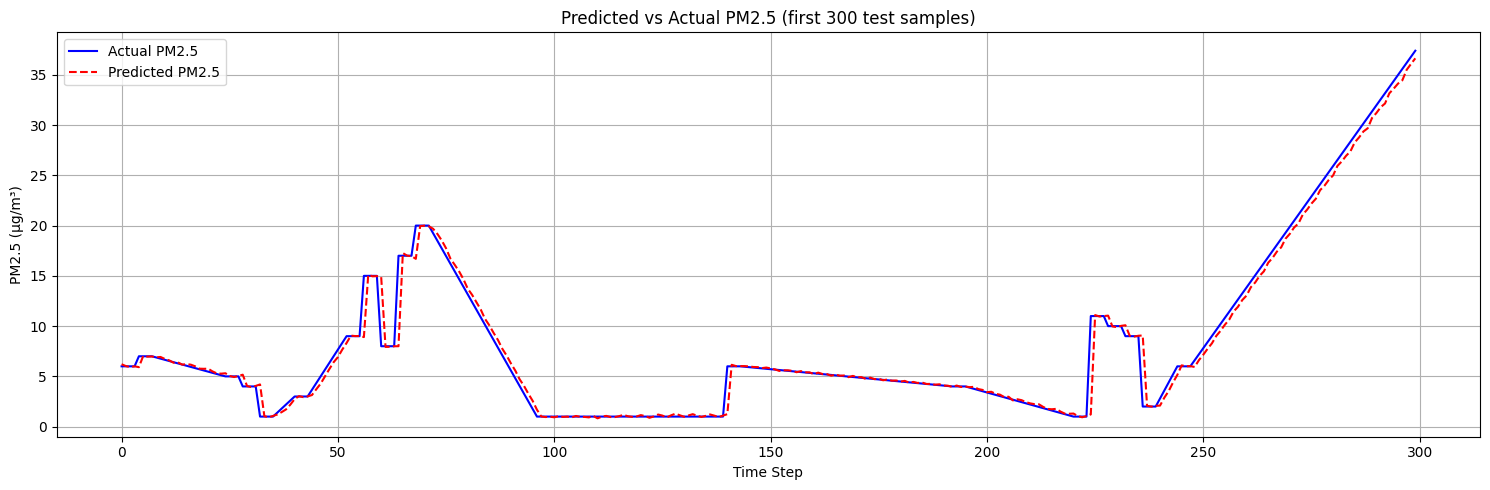

In [ ]:
import matplotlib.pyplot as plt

# You can change this number to plot more/less points
n_points = 300

plt.figure(figsize=(15, 5))
plt.plot(y_test_inv[:n_points], label='Actual PM2.5', color='blue')
plt.plot(y_pred_inv[:n_points], label='Predicted PM2.5', color='red', linestyle='dashed')
plt.title("Predicted vs Actual PM2.5 (first {} test samples)".format(n_points))
plt.xlabel("Time Step")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


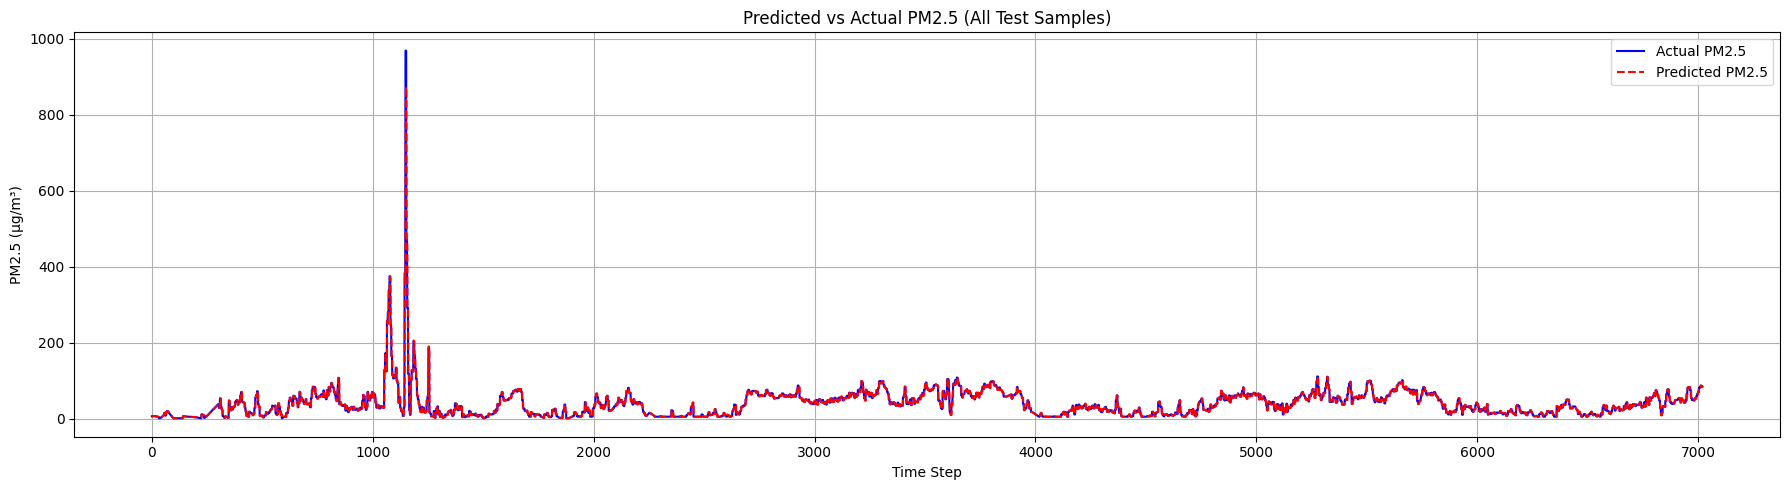

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.plot(y_test_inv, label='Actual PM2.5', color='blue')
plt.plot(y_pred_inv, label='Predicted PM2.5', color='red', linestyle='dashed')
plt.title("Predicted vs Actual PM2.5 (All Test Samples)")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step


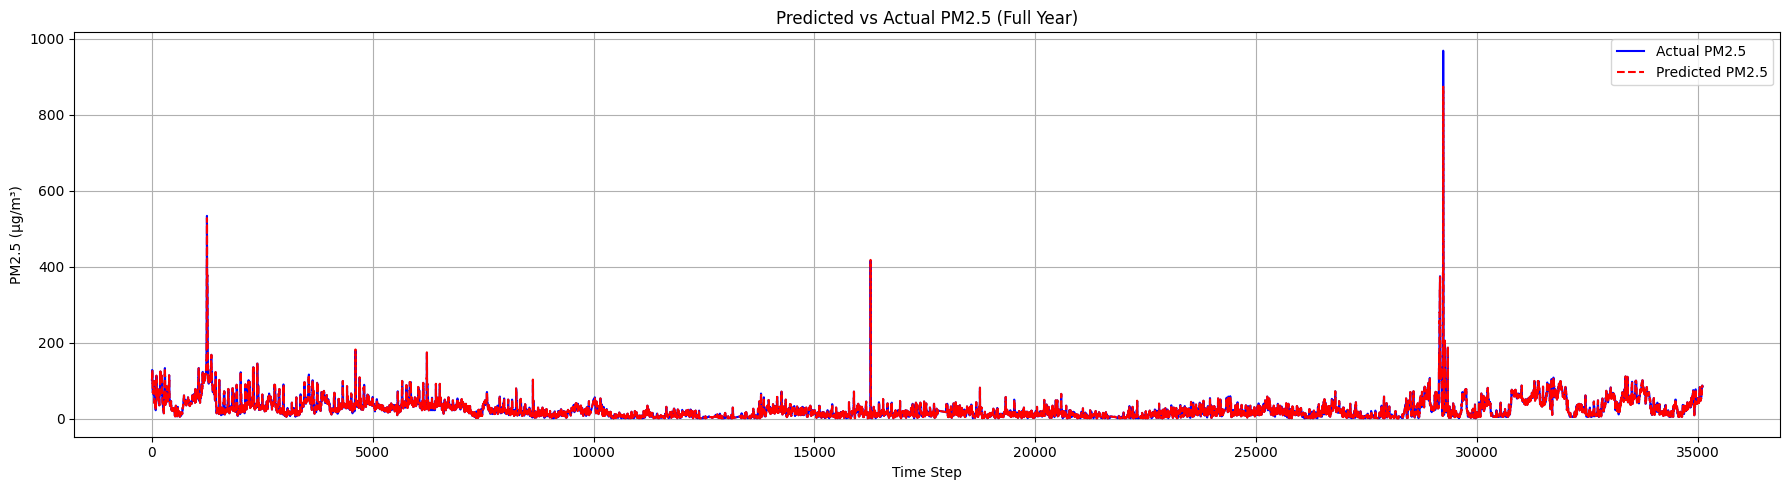

In [ ]:
y_full_pred = model.predict(X)

# Inverse transform
pm25_index = features.index('PM2.5')

# Pad with zeros to match scaler shape
y_full_pred_inv = scaler.inverse_transform(
    np.hstack((y_full_pred, np.zeros((len(y_full_pred), len(features)-1))))
)[:, pm25_index]

y_full_actual_inv = scaler.inverse_transform(
    np.hstack((y.reshape(-1, 1), np.zeros((len(y), len(features)-1))))
)[:, pm25_index]

# Plot entire year (training + testing)
plt.figure(figsize=(18, 5))
plt.plot(y_full_actual_inv, label='Actual PM2.5', color='blue')
plt.plot(y_full_pred_inv, label='Predicted PM2.5', color='red', linestyle='dashed')
plt.title("Predicted vs Actual PM2.5 (Full Year)")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mae = mean_absolute_error(y_full_actual_inv, y_full_pred_inv)
rmse = np.sqrt(mean_squared_error(y_full_actual_inv, y_full_pred_inv))
r2 = r2_score(y_full_actual_inv, y_full_pred_inv)

print("MAE (Full Data):", mae)
print("RMSE (Full Data):", rmse)
print("R² (Full Data):", r2)

MAE (Full Data): 1.6027500682502147
RMSE (Full Data): 7.400183651746868
R² (Full Data): 0.9331999038731792


220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


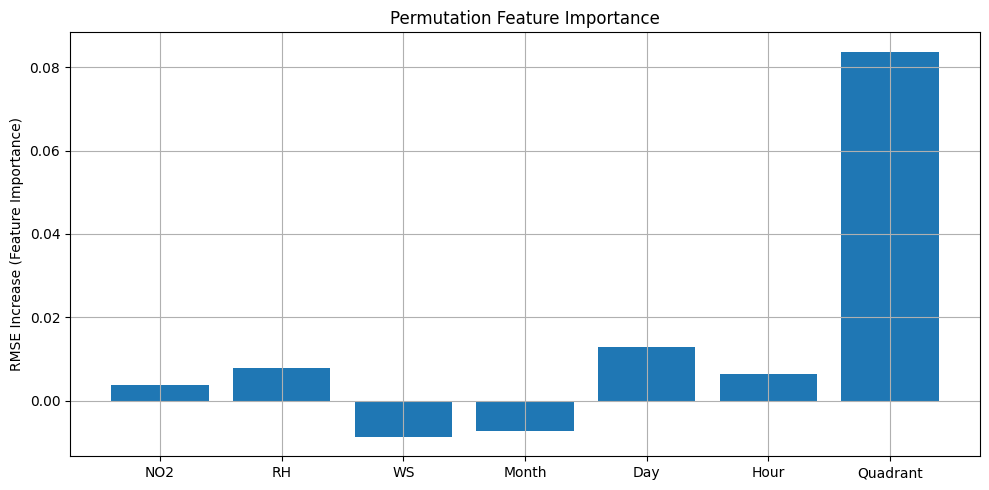

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def permutation_feature_importance(model, X_original, y_true, scaler, features, pm25_index):
    base_pred = model.predict(X_original)
    base_pred_inv = scaler.inverse_transform(np.hstack((base_pred, np.zeros((len(base_pred), len(features)-1)))))[:, pm25_index]
    y_true_inv = scaler.inverse_transform(np.hstack((y_true.reshape(-1, 1), np.zeros((len(y_true), len(features)-1)))))[:, pm25_index]
    base_rmse = np.sqrt(mean_squared_error(y_true_inv, base_pred_inv))

    importances = []
    for i in range(1,X_original.shape[2]):  # iterate over features
        X_permuted = X_original.copy()
        np.random.shuffle(X_permuted[:, :, i])  # shuffle only the i-th feature
        permuted_pred = model.predict(X_permuted)
        permuted_pred_inv = scaler.inverse_transform(np.hstack((permuted_pred, np.zeros((len(permuted_pred), len(features)-1)))))[:, pm25_index]
        permuted_rmse = np.sqrt(mean_squared_error(y_true_inv, permuted_pred_inv))
        importances.append(permuted_rmse - base_rmse)

    return importances

# Calculate importance scores
importances = permutation_feature_importance(model, X_test, y_test, scaler, features, pm25_index)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(features[1:], importances)  # exclude PM2.5 as it's the target
plt.ylabel("RMSE Increase (Feature Importance)")
plt.title("Permutation Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save("pm25_model.keras")
from google.colab import files
files.download("pm25_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(scaler, "scaler_PM25.save")
files.download("scaler_PM25.save")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>